# DAS - UE1 - Teil 2 - Brunner Michael - se21m021


# Import necessary dependencies

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

# Load and merge datasets

To be able to work with the data on my laptop I took a look at a sample of 50.000 data-points. Fortunately the data is mixed in the initial dataset, so reordering is not required.
I found that at a number of 50.000 the variations in data-points was low enough to get meaningful results.

In [178]:
census_data = pd.read_csv('.\\data\\census\\USCensus1990.data.txt', sep=",")

In [179]:
census_data = census_data.sample(frac=1, random_state=42)
census_data = census_data.iloc[:50000, 1:]
census_data.shape

(50000, 68)

In [180]:
attributes = ['dAge', 'iSex', 'iEnglish', 'dIncome1', 'dIndustry', "dHours",
               'dRearning', "iSchool", "iYearsch"]

census_data_reduced = census_data[attributes]
census_data_reduced.head()

dAge  iSex  iEnglish  dIncome1  dIndustry  dHours  dRearning  \
179679      1     0         0         0          0       0          0   
1518742     2     0         0         0          0       0          0   
158328      5     1         0         1          8       1          2   
1018288     3     1         1         1          7       1          2   
68171       7     1         0         0          0       0          0   

         iSchool  iYearsch  
179679         1         1  
1518742        2         7  
158328         1        12  
1018288        2        11  
68171          1        14

This time around I did not use the StandardScaler because this dataset only contains categorical data

In [181]:
from sklearn.decomposition import PCA

census_reduced_without_earnings_and_sex= census_data_reduced.drop(['dRearning', 'iSex'], axis=1)

n_components = 7
pca = PCA(n_components=n_components)

pca.fit(census_reduced_without_earnings_and_sex)

pca_df = pd.DataFrame(pca.transform(census_reduced_without_earnings_and_sex), columns=['PCA%i' % i for i in range(n_components)], index=census_reduced_without_earnings_and_sex.index)
pca_df = pd.concat([pca_df, census_data_reduced.dRearning, census_data_reduced.iSex], axis=1)
pca_df.head()

PCA0      PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
179679  -8.714264  2.196076 -0.316651  0.212757 -0.258926 -0.229953 -0.374533   
1518742 -4.214602 -1.544008 -1.718185 -0.839246  0.052278 -0.124791  0.390905   
158328   5.268096  0.464870  0.737791 -1.614162 -0.103209 -0.209654 -0.224858   
1018288  3.516290  1.078180 -0.955226 -1.695350  0.453867  0.812841  0.346371   
68171    1.826667 -7.379890  0.257396 -1.072478  0.174571 -0.324244 -0.267493   

         dRearning  iSex  
179679           0     0  
1518742          0     0  
158328           2     1  
1018288          2     1  
68171            0     1

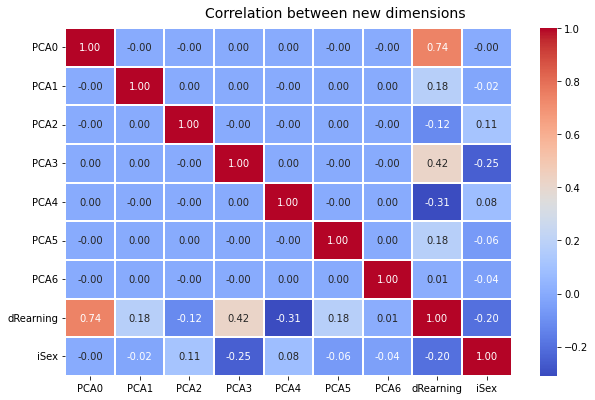

In [182]:
f, ax = plt.subplots(figsize=(10, 6))
corr = pca_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation between new dimensions', fontsize=14)

Interestingly there seems to be a strong connection between the first dimension that has been created by the pca, PCA0 and the yearly earnings of people. The same is true for PCA3 and to an extent also for PCA5, but not as pronounced.
All other dimensions don't correlate hardly at all, as expected.

In [183]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n_components=1

lda = LinearDiscriminantAnalysis(n_components=n_components, solver="svd")

lda.fit(census_reduced_without_earnings_and_sex, census_data_reduced['dRearning'].values)

lda_df = pd.DataFrame(lda.transform(census_reduced_without_earnings_and_sex), columns=['LDA%i' % i for i in range(n_components)], index=census_reduced_without_earnings_and_sex.index)
lda_df = pd.concat([lda_df, census_data_reduced.dRearning, census_data_reduced.iSex], axis=1)
lda_df.head()

LDA0  dRearning  iSex
179679   3.265570          0     0
1518742  3.087415          0     0
158328  -0.629732          2     1
1018288 -0.413770          2     1
68171    2.715103          0     1

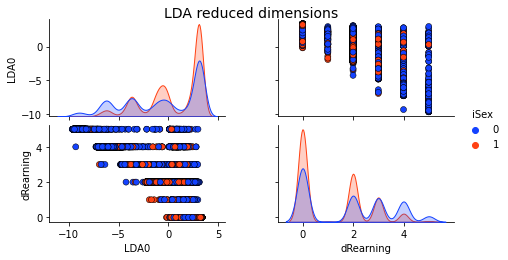

In [184]:
pp = sns.pairplot(lda_df, hue='iSex', height=1.8, aspect=1.8,
                  palette={0: "#1442FF", 1: "#FF4214"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('LDA reduced dimensions', fontsize=14)


<AxesSubplot:xlabel='LDA0', ylabel='dRearning'>

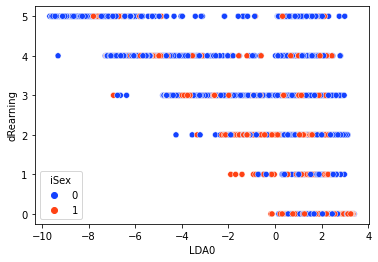

In [185]:
sns.scatterplot(data=lda_df, x="LDA0", y="dRearning", hue="iSex", palette={0: "#1442FF", 1: "#FF4214"})

<AxesSubplot:xlabel='LDA0', ylabel='dRearning'>

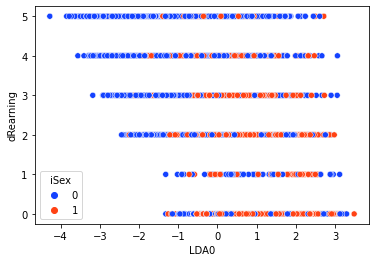

In [186]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n_components=1

lda = LinearDiscriminantAnalysis(n_components=n_components, solver="eigen", shrinkage="auto")

#census_reduced_without_earnings_and_sex = census_data_reduced.drop(['iSex', 'dRearning'], axis=1)

lda.fit(census_reduced_without_earnings_and_sex, census_data_reduced['iSex'].values)

lda_df = pd.DataFrame(lda.transform(census_reduced_without_earnings_and_sex), columns=['LDA%i' % i for i in range(n_components)], index=census_reduced_without_earnings_and_sex.index)
lda_df = pd.concat([lda_df, census_data_reduced.dRearning, census_data_reduced.iSex], axis=1)
lda_df.head()

sns.scatterplot(data=lda_df, x="LDA0", y="dRearning", hue="iSex", palette={0: "#1442FF", 1: "#FF4214"})

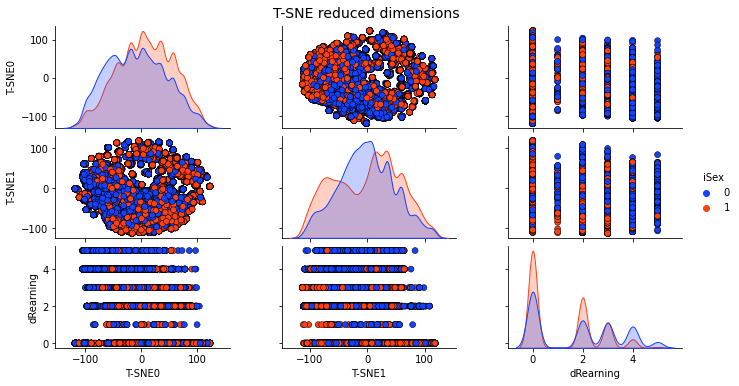

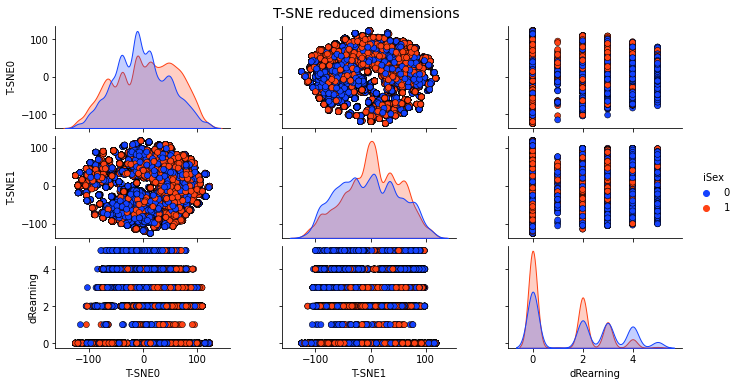

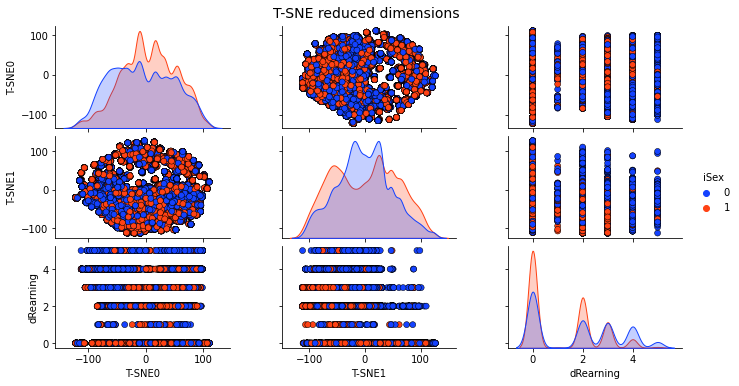

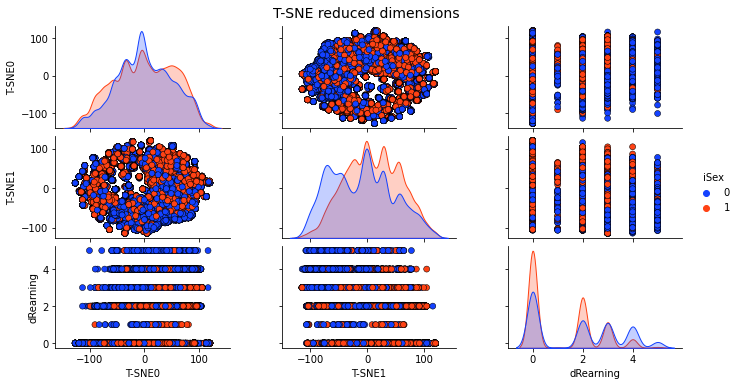

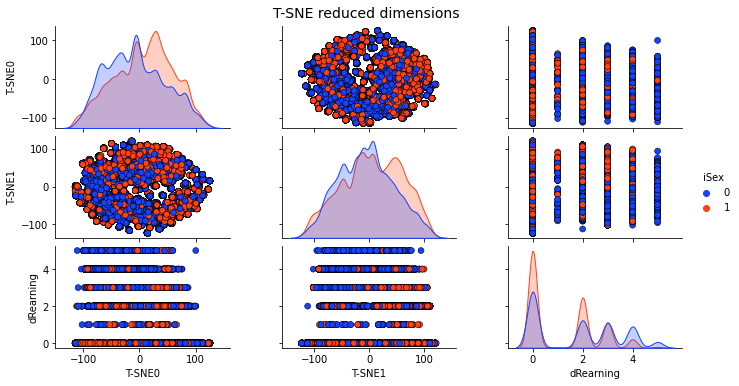

In [187]:
from sklearn.manifold import TSNE

n_components = 2

for i in range(5):
    tsne = TSNE(n_components=n_components, learning_rate='auto', init='random')
    tsne_df = pd.DataFrame(tsne.fit_transform(census_reduced_without_earnings_and_sex), columns=['T-SNE%i' % i for i in range(n_components)], index=census_reduced_without_earnings_and_sex.index)
    tsne_df = pd.concat([tsne_df, census_data_reduced.dRearning, census_data_reduced.iSex], axis=1)
    tsne_df.head()

    pp = sns.pairplot(tsne_df, hue='iSex', height=1.8, aspect=1.8,
                      palette={0: "#1442FF", 1: "#FF4214"},
                      plot_kws=dict(edgecolor="black", linewidth=0.5))
    fig = pp.fig
    fig.subplots_adjust(top=0.93, wspace=0.3)
    t = fig.suptitle('T-SNE reduced dimensions', fontsize=14)

In [ ]:
from sklearn.manifold import TSNE

n_components = 2

for i in range(1, 6):
    lr = i * 200
    tsne = TSNE(n_components=n_components, learning_rate=lr, init='random')
    tsne_df = pd.DataFrame(tsne.fit_transform(census_reduced_without_earnings_and_sex), columns=['T-SNE%i' % i for i in range(n_components)], index=census_reduced_without_earnings_and_sex.index)
    tsne_df = pd.concat([tsne_df, census_data_reduced.dRearning, census_data_reduced.iSex], axis=1)
    tsne_df.head()

    pp = sns.pairplot(tsne_df, hue='iSex', height=1.8, aspect=1.8,
                      palette={0: "#1442FF", 1: "#FF4214"},
                      plot_kws=dict(edgecolor="black", linewidth=0.5))
    fig = pp.fig
    fig.subplots_adjust(top=0.93, wspace=0.3)
    t = fig.suptitle('T-SNE reduced dimensions with learning_rate: ' + str(lr), fontsize=14)

In [ ]:
tsne = TSNE(n_components=n_components, learning_rate='auto', init='pca')
tsne_df = pd.DataFrame(tsne.fit_transform(census_reduced_without_earnings_and_sex), columns=['T-SNE%i' % i for i in range(n_components)], index=census_reduced_without_earnings_and_sex.index)
tsne_df = pd.concat([tsne_df, census_data_reduced.dRearning, census_data_reduced.iSex], axis=1)
tsne_df.head()

pp = sns.pairplot(tsne_df, hue='iSex', height=1.8, aspect=1.8,
                  palette={0: "#1442FF", 1: "#FF4214"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('T-SNE reduced dimensions', fontsize=14)